In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import datasets
import pylab as pl #chart lib
import pandas as pd
import numpy as np

In [0]:
#Lets use Iris Dataset (So Famous!)
iris = datasets.load_iris()

In [0]:
#converting to dataframe format
df_iris = pd.DataFrame(data=np.c_[iris['data'],iris['target']], columns=iris['feature_names'] + ['target'])

In [8]:
#checking dataset
print(df_iris.head(10))

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2     0.0
1                4.9               3.0  ...               0.2     0.0
2                4.7               3.2  ...               0.2     0.0
3                4.6               3.1  ...               0.2     0.0
4                5.0               3.6  ...               0.2     0.0
5                5.4               3.9  ...               0.4     0.0
6                4.6               3.4  ...               0.3     0.0
7                5.0               3.4  ...               0.2     0.0
8                4.4               2.9  ...               0.2     0.0
9                4.9               3.1  ...               0.1     0.0

[10 rows x 5 columns]


In [0]:
#transform data into array format
x = df_iris.iloc[:, :-1].values #input data
y = df_iris.iloc[:, 4].values #output data

In [0]:
#split train - test dataset
from sklearn.model_selection import train_test_split 
#splitting and setting 20% data as a test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.20) 

In [0]:
#applying data normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#trainning the model
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

In [0]:
#predicting
y_pred = clf.predict(X_test)

In [15]:
#building confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      0.88      0.93         8
         2.0       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



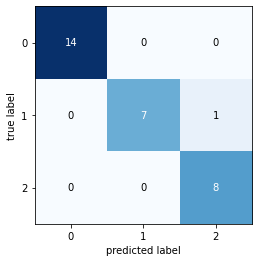

In [16]:
# analysing the model
#lets plot confusion matrix
matrix = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=matrix)
pl.savefig('DTreeConfusionMatrix.png')
pl.show()

In [0]:
#visualizing Decision Tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

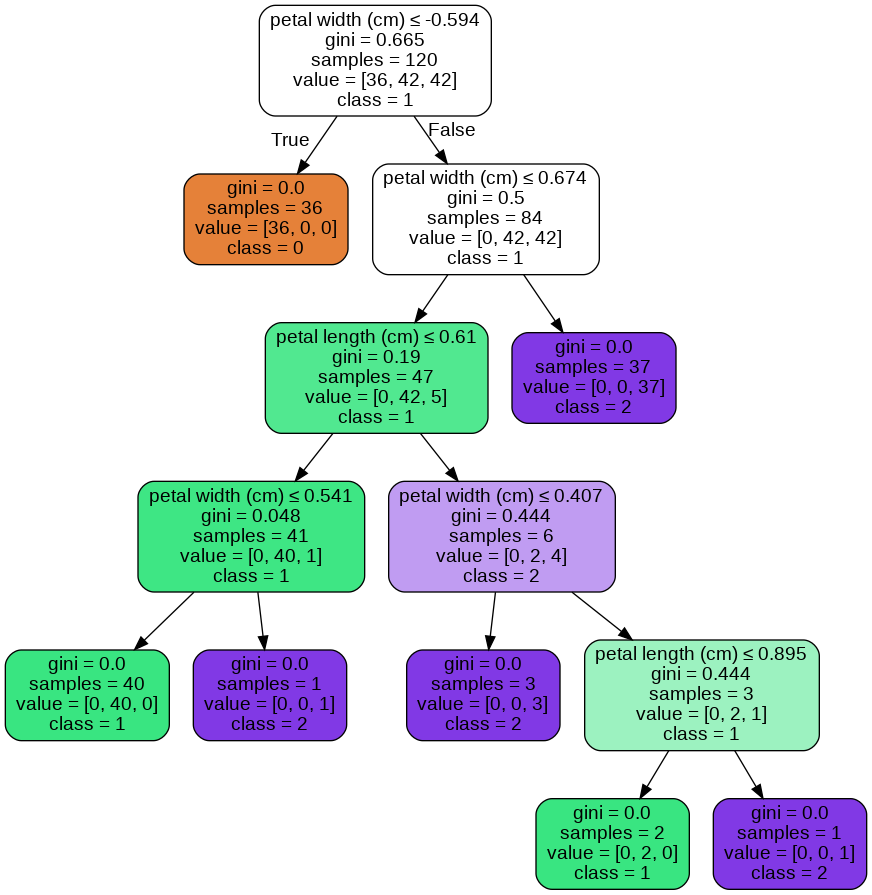

In [20]:
#building Dtree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = iris.feature_names,
                class_names = ['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('iris.png')
Image(graph.create_png())